# Tricking Stats

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tricking = pd.read_csv('Tricking.csv')
tricking

,Date,Trick_Name,Attempts,Landed_Count,Surface
0,2025-09-25,Fulls,3,3,Spring Floor
1,2025-09-25,Full Hyperhook,7,7,Spring Floor
2,2025-09-25,Double Full,7,6,Spring Floor
3,2025-09-25,Corks,3,3,Spring Floor
4,2025-09-25,Cheat 1080,2,2,Spring Floor
...,...,...,...,...,...
251,2026-01-25,Cheat 900,3,3,Spring Floor
252,2026-01-25,Cheat 1080,7,5,Spring Floor
253,2026-01-25,Backside 1260,3,3,Spring Floor
254,2026-01-25,Cheat 1260,1,0,Spring Floor


In [3]:
# List of tricks
sorted(tricking['Trick_Name'].unique())

['B-Twist',
 'B-Twist (Shuriken)',
 'B-Twist Hyperhook',
 'Back Handspring',
 'Backside 1260',
 'Boxcutter',
 'Cheat 1080',
 'Cheat 1260',
 'Cheat 900',
 'Corks',
 'Corks (Round)',
 'Double B-Twist',
 'Double Cork',
 'Double Full',
 'Double Full Hyperhook',
 'Front Tuck',
 'Full Hyperhook',
 'Full Hyperhook (Shuriken)',
 'Full Snapu',
 'Fulls',
 'Gainer',
 'Gainer (Switch)',
 'Gainers',
 'Round Off Backflip',
 'Round Off Backflip (Multiple Kicks)',
 'Side Swipe',
 'Triple Full',
 'Wrap Full',
 'Wrap Full Hyperhook']

In [4]:
# Check for spellling error when new data is added (28)
len(tricking['Trick_Name'].unique())

29

In [5]:
tricking['Date'] = pd.to_datetime(tricking['Date'])
tricking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          256 non-null    datetime64[ns]
 1   Trick_Name    256 non-null    object        
 2   Attempts      256 non-null    int64         
 3   Landed_Count  256 non-null    int64         
 4   Surface       256 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 10.1+ KB


### Tricks I've done most often

In [6]:
tricking['Trick_Name'].value_counts().head() # Value

Trick_Name
Corks             28
Full Hyperhook    27
Fulls             24
Cheat 1080        22
Double Full       18
Name: count, dtype: int64

In [7]:
tricking['Trick_Name'].value_counts(normalize = True).head() # Percentage

Trick_Name
Corks             0.109375
Full Hyperhook    0.105469
Fulls             0.093750
Cheat 1080        0.085938
Double Full       0.070312
Name: proportion, dtype: float64

### Show tricks that I didn't land 100% of the time

In [8]:
nlanded100 = tricking['Attempts'] != tricking['Landed_Count']
tricking[nlanded100].head()

,Date,Trick_Name,Attempts,Landed_Count,Surface
2,2025-09-25,Double Full,7,6,Spring Floor
7,2025-09-28,Double B-Twist,3,0,Spring Floor
11,2025-10-05,Corks (Round),7,5,Spring Floor
12,2025-10-05,Cheat 1080,5,3,Spring Floor
22,2025-10-08,Round Off Backflip (Multiple Kicks),3,2,Puzzle Mats


## Trick Analysis
Function to aggregate chosen trick by months and calculate the successrates by month

In [9]:
# trick_name (string): name of the trick that I wish to analyze 
def trick_analysis(trick_name):
    # Filter for specific trick
    trick = tricking[tricking["Trick_Name"] == trick_name]

    # Aggregate by month 
    # To account for variation in the number of attempts per day, we sum all attempts in the month, then calculate the success rate after 
    trick_monthly = trick.groupby(pd.Grouper(key='Date', freq='ME'))[
    ['Attempts', 'Landed_Count']
        ].sum().reset_index()
    trick_monthly['Date'] = trick_monthly['Date'].dt.strftime('%b %Y')
    trick_monthly["Success_Rate"] = trick_monthly["Landed_Count"] / trick_monthly["Attempts"]
    trick_monthly["rolling_avg"] = trick_monthly["Success_Rate"].rolling(3).mean()
    trick_monthly["Trick_Name"] = trick_name
    
    return trick_monthly

In [10]:
test = trick_analysis("B-Twist")
test

,Date,Attempts,Landed_Count,Success_Rate,rolling_avg,Trick_Name
0,Oct 2025,3,2,0.666667,NaN,B-Twist
1,Nov 2025,15,14,0.933333,NaN,B-Twist
2,Dec 2025,23,23,1.000000,0.866667,B-Twist
3,Jan 2026,6,6,1.000000,0.977778,B-Twist


In [11]:
# agg_data (df): Data frame with the data that has been aggregated by month (output of trick_analysis())
def trick_visual(agg_data):
    plt.figure()
    plt.plot(agg_data["Date"], agg_data["Success_Rate"], marker="o", label = "Monthly Success Rate")
    plt.plot(agg_data["Date"], agg_data["rolling_avg"], color = "red", label = "Rolling Average")
    plt.xlabel("Date")
    plt.ylabel("Success Rate")
    plt.title(agg_data['Trick_Name'][0] + " Success Rate Over Time")
    plt.ylim(-0.05, 1.05)
    plt.legend()
    return plt.show()

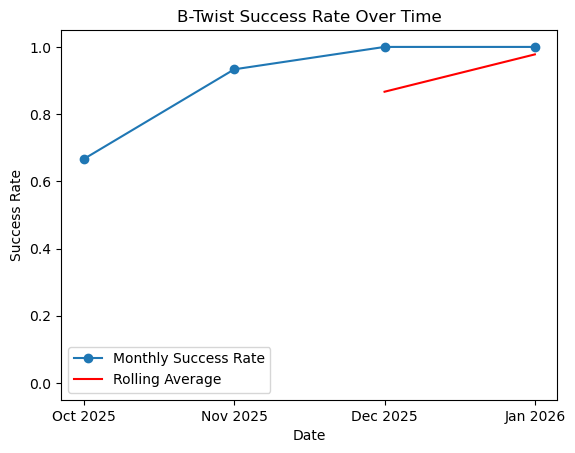

In [12]:
trick_visual(test)